<a href="https://colab.research.google.com/github/swaroopkasaraneni/DatasciencePython/blob/main/CertificateProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective:
*   Provide the best-performing model to determine the price of the used car.
*   Providing the most important features which determine the price.



```
●Id: Unique ID assigned to a specific car.
●year: Manufacture year of the car.
●brand: Brand of the car.
●full_model_name: Model name includes other details such as engine capacity, transmission,etc., basically a detailed model name.
●model_name: Just the model name of the car.
●price: Sell price of the 2nd ownership car.
●distance_travelled(km): Distance traveled by car.
●fuel_type : Fuel engine type .
●city: City where the car is registered.
●car_age: Age of the car
```


```
Steps and Tasks:
●Import libraries and load dataset
●Exploratory Data Analysis:
    1. Univariate Analysis to understand the distribution of features.
    2. Multivariate analysis to determine correlations.
●Layout regression experiment space.
●Publish the performance of all the models on the same hold-out/ test dataset.
●List out the most important features determining the price of used cars.
```





In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

# Load dataset
file_path = "cars.csv"
data = pd.read_csv(file_path)

print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1725 non-null   int64  
 1   year                     1725 non-null   int64  
 2   brand                    1725 non-null   object 
 3   full_model_name          1725 non-null   object 
 4   model_name               1725 non-null   object 
 5   price                    1725 non-null   float64
 6   distance_travelled(kms)  1725 non-null   float64
 7   fuel_type                1725 non-null   object 
 8   city                     1725 non-null   object 
 9   brand_rank               1725 non-null   int64  
 10  car_age                  1725 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 148.4+ KB
None
   Id  year          brand                                    full_model_name  \
0   0  2016          Honda               

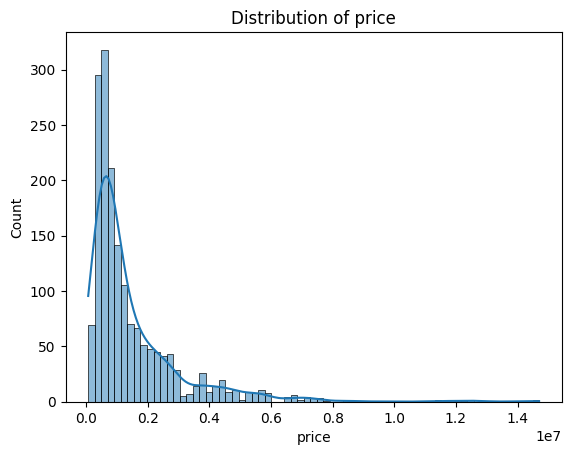

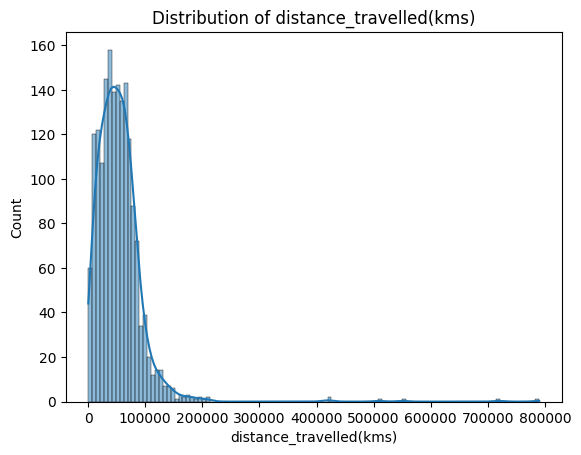

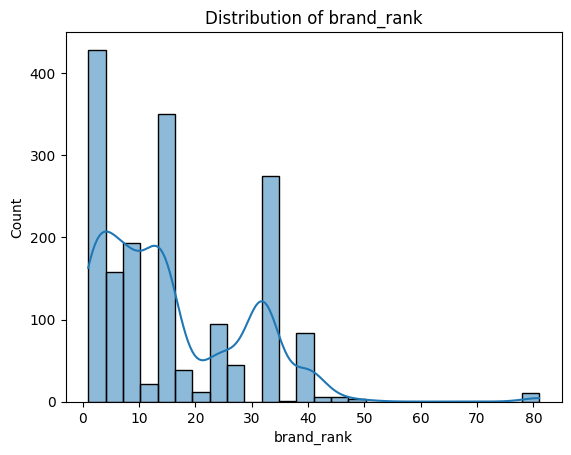

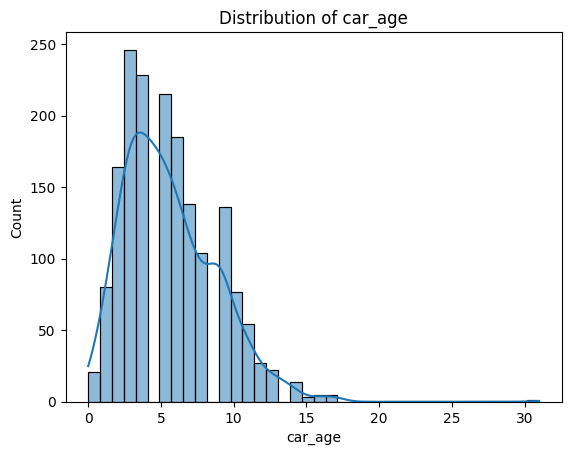

In [3]:
#Univariate Analysis
# Distribution of numerical features
numerical_features = ['price', 'distance_travelled(kms)', 'brand_rank', 'car_age']
for feature in numerical_features:
    sns.histplot(data[feature], kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()




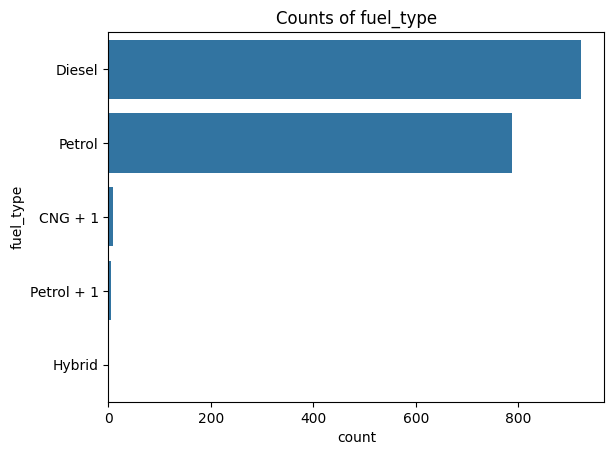

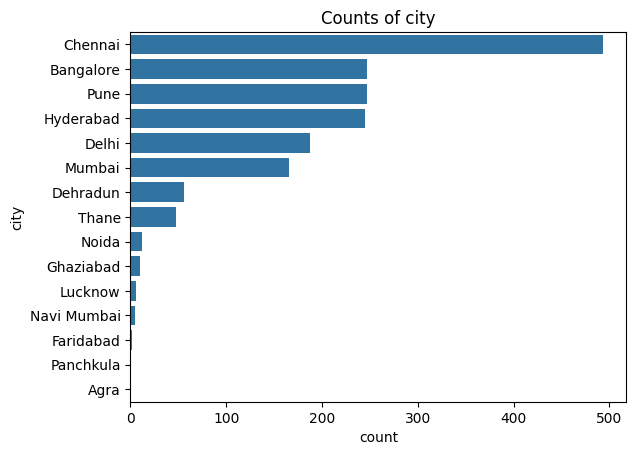

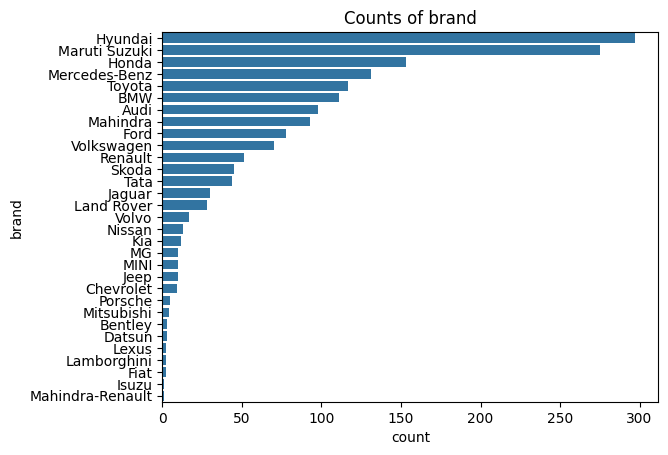

In [4]:
# Value counts of categorical features
categorical_features = ['fuel_type', 'city', 'brand']
for feature in categorical_features:
    sns.countplot(y=data[feature], order=data[feature].value_counts().index)
    plt.title(f"Counts of {feature}")
    plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       1725 non-null   int64  
 1   year                     1725 non-null   int64  
 2   brand                    1725 non-null   int64  
 3   full_model_name          1725 non-null   int64  
 4   model_name               1725 non-null   int64  
 5   price                    1725 non-null   float64
 6   distance_travelled(kms)  1725 non-null   float64
 7   fuel_type                1725 non-null   int64  
 8   city                     1725 non-null   int64  
 9   brand_rank               1725 non-null   int64  
 10  car_age                  1725 non-null   float64
dtypes: float64(3), int64(8)
memory usage: 148.4 KB
None


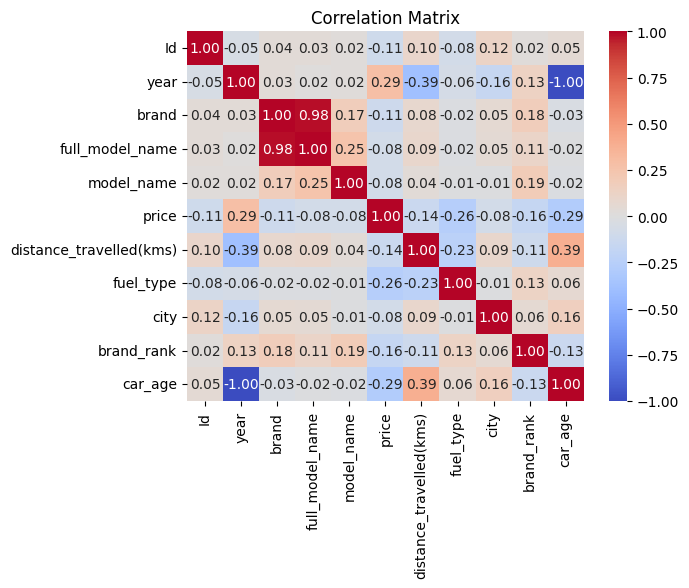

In [9]:
#Multivariate Analysis

from sklearn.preprocessing import LabelEncoder

data_numeric = data.copy()
categorical_columns = ['brand', 'full_model_name','fuel_type', 'city', 'model_name']
label_encoder = LabelEncoder()

for col in categorical_columns:
    data_numeric[col] = label_encoder.fit_transform(data_numeric[col])
print(data_numeric.info())


# Compute the correlation matrix
correlation_matrix = data_numeric.corr()

# Correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()




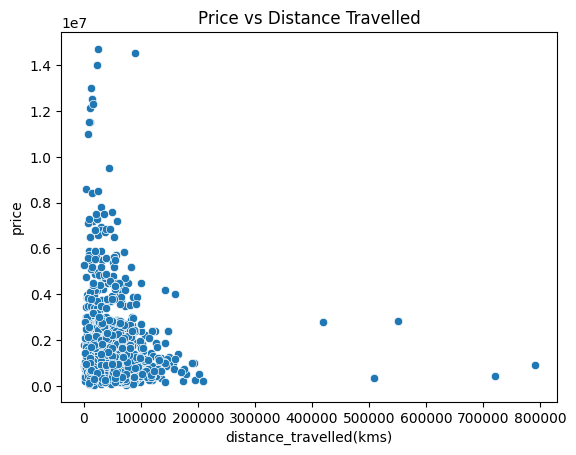

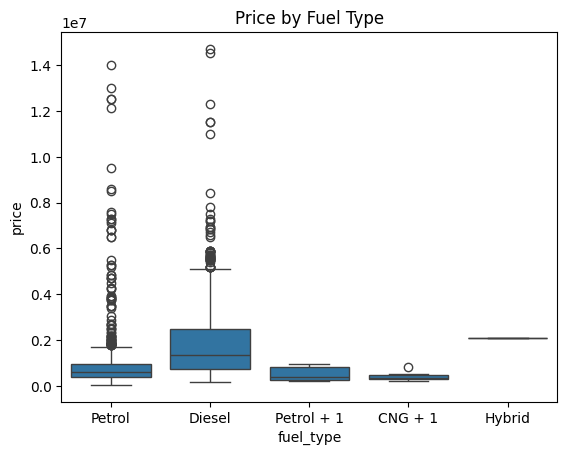

In [10]:
# Relationship between price and key features
sns.scatterplot(x='distance_travelled(kms)', y='price', data=data)
plt.title("Price vs Distance Travelled")
plt.show()

sns.boxplot(x='fuel_type', y='price', data=data)
plt.title("Price by Fuel Type")
plt.show()

In [19]:
# Define features and target
X = data.drop(columns=['price', 'full_model_name','Id'])
y = data['price']

# Define categorical and numerical columns
categorical_columns = ['brand', 'fuel_type', 'city', 'model_name']
numerical_columns = ['year', 'distance_travelled(kms)', 'brand_rank', 'car_age']

numeric_transformer = SimpleImputer(strategy='median')
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [20]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'SVR': SVR(kernel='rbf')
}
results = {}
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    pipeline.fit(X_train, y_train)

    # Predictions
    y_pred = pipeline.predict(X_test)

    # Metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R2': r2}
    print(f"{model_name} - MSE: {mse:.2f}, R2: {r2:.2f}")

# Display results
results_df = pd.DataFrame(results).T
print(results_df)


Linear Regression - MSE: 1273920160801.41, R2: 0.62
Decision Tree - MSE: 1100054994524.96, R2: 0.67
Random Forest - MSE: 903846276862.55, R2: 0.73
SVR - MSE: 3980299842586.73, R2: -0.19
                            MSE        R2
Linear Regression  1.273920e+12  0.620520
Decision Tree      1.100055e+12  0.672311
Random Forest      9.038463e+11  0.730759
SVR                3.980300e+12 -0.185667


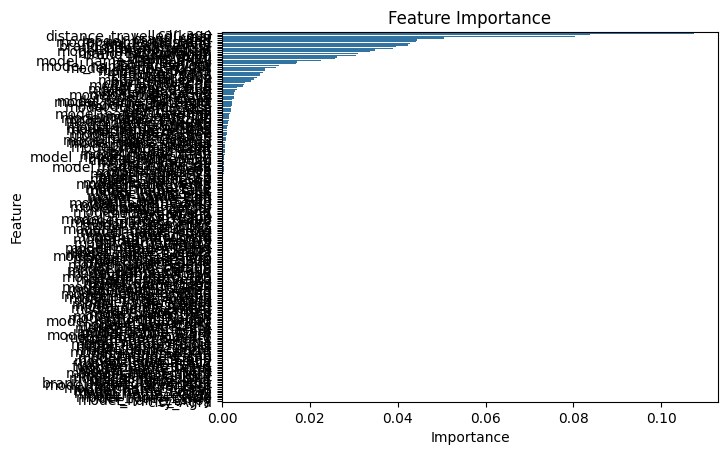

In [21]:
# Train the best model (assume Random Forest performed the best)
best_model = RandomForestRegressor(random_state=42, n_estimators=100)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', best_model)])
pipeline.fit(X_train, y_train)

# Feature importance
feature_names = numerical_features + list(pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
importances = pipeline.named_steps['model'].feature_importances_
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()
